VIETNAM .shp file by district

In [790]:
import geopandas as gpd
import pandas as pd
from useful_func import *
import numpy as np
#url = "https://vi.wikipedia.org/wiki/Danh_s%C3%A1ch_%C4%91%C6%A1n_v%E1%BB%8B_h%C3%A0nh_ch%C3%ADnh_c%E1%BA%A5p_huy%E1%BB%87n_c%E1%BB%A7a_Vi%E1%BB%87t_Nam#Danh_s%C3%A1ch_c%C3%A1c_%C4%91%C6%A1n_v%E1%BB%8B_h%C3%A0nh_ch%C3%ADnh_c%E1%BA%A5p_huy%E1%BB%87n"
#tables = pd.read_html(url, encoding='utf-8')
#tables[0].to_csv('./raw/dist_list_wiki.csv', compression=None)

#gdf = gpd.read_file("./gmvn10/polbnda.shp")
#r_dist = ['Q', "Q.", "H.", "."]
#gdf['laa'] = gdf['laa'].str.upper()
#for k in r_dist:
#    gdf['laa'] = gdf['laa'].str.replace(k, "", regex=False)

#gdf[gdf['nam'] == "HA NOI"]
gdf = gpd.read_file("./diaphanhuyen/Dia_phan_Huyen.shp")
gdf = gdf.drop(columns=['OBJECTID', 'Dan_So', 'f_code', 'Nam_TK', 'Code_vung'], axis=1)
gdf.columns = ['region', 'dist', 'geometry']
r_dist = ['Q ', "Q.", "H.", "TP. ", "."]
gdf['region'] = gdf['region'].apply(lambda x: xoa_dau(x.upper()))
gdf['dist'] = gdf['dist'].apply(lambda x: xoa_dau(x.upper()))
for k in r_dist:
    gdf['dist'] = gdf['dist'].str.replace(k, "", regex=False)
gdf[gdf['region'] == "CA MAU"]

,region,dist,geometry
0,CA MAU,NAM CAN,"POLYGON ((105.05492 8.85322, 105.05819 8.85155..."
1,CA MAU,DAM DOI,"POLYGON ((105.16041 9.09551, 105.16228 9.09309..."
2,CA MAU,CAI NUOC,"POLYGON ((105.08692 9.13987, 105.08773 9.13954..."
4,CA MAU,CA MAU,"POLYGON ((105.1723 9.26629, 105.17518 9.26575,..."
12,CA MAU,THOI BINH,"POLYGON ((105.02254 9.54657, 105.02566 9.54461..."
13,CA MAU,U MINH,"POLYGON ((104.91714 9.56064, 104.91931 9.55852..."
1004,CA MAU,NGOC HIEN,"POLYGON ((105.19192 8.76669, 105.19283 8.76602..."
1005,CA MAU,NGOC HIEN,"POLYGON ((104.87929 8.38103, 104.87884 8.38095..."
1006,CA MAU,NGOC HIEN,"POLYGON ((104.85387 8.42003, 104.85434 8.41991..."
1007,CA MAU,NGOC HIEN,"POLYGON ((104.84051 8.43987, 104.83991 8.43952..."


In [791]:
df = pd.read_csv('./raw/dist_list_wiki.csv', index_col=0)
df = df.drop(columns=["Số thứ tự", "Chú thích"], axis=1)
df.columns = ["dist", 'region', 'population', 'area_km2', 'density', 'adm_id']
df['region'] = df['region'].apply(lambda x: xoa_dau(x.upper()))
df['dist'] = df['dist'].apply(lambda x: xoa_dau(x.upper()))
m_replace = {"THANH PHO HO CHI MINH": "HO CHI MINH", 
             "TP.HO CHI MINH": "HO CHI MINH",
             " – ": " "} # - = U+2013
for k, v in m_replace.items():
    df['region'] = df['region'].str.replace(k, v, regex=False)
    df['dist'] = df['dist'].str.replace(k, v, regex=False)
df['population'] = df['population'].str.replace('.', "").str.replace(r"\[[0-9]+\]", '', regex=True).astype(int)
df['area_km2'] = df['area_km2'].str.replace('.', "").str.replace(r"\[[0-9]+\]", '', regex=True).str.replace(",", ".").astype(float)

df['density'] = df['density'].astype(str).str.replace('.', "").astype(float)

df['dist'] = df['dist'].str.replace(r'd{1,2}', r" d{1,2}", regex=True)
df = df.drop(columns='adm_id', axis=1)
df[df['region'] == "HA NOI"]

,dist,region,population,area_km2,density
14,BA DINH,HA NOI,221893,92.0,24119.0
20,BA VI,HA NOI,290580,4230.0,6870.0
33,BAC TU LIEM,HA NOI,340605,452.0,7529.0
100,CAU GIAY,HA NOI,292536,124.0,23516.0
130,CHUONG MY,HA NOI,337326,2374.0,1421.0
161,DAN PHUONG,HA NOI,174501,780.0,2237.0
179,DONG ANH,HA NOI,405749,1856.0,2186.0
180,DONG DA,HA NOI,371606,100.0,37161.0
211,GIA LAM,HA NOI,286102,1167.0,2452.0
227,HA DONG,HA NOI,397854,496.0,8021.0


In [792]:
gdf = gdf.fillna(0)
gdf = gdf[gdf['dist'] != "HOANG SA"]
gdf = gdf[gdf['dist'] != "TRUONG SA"]
r2_dist = {"TP": "",
           ".": "",
           "-": " ",
           "QUI NHON": "QUY NHON",
           "TINH GIA": "NGHI SON",
           "QUANG 5": "QUAN 5",
           "QUAN 2": "THU DUC",
           "QUAN 9": "THU DUC",
           "HOOC MON": "HOC MON",
           "KRONG PAK": "KRONG PAC",
           "TU LIEM": "NAM TU LIEM",
           "TAY TRA": "TRA BONG",
           "HOANH BO": "HA LONG",
           "MY LOC": "NAM DINH",
           "DA KRONG": "DAKRONG",
           " HO CHI MINH": "HO CHI MINH"}
for k, v in r2_dist.items():
    gdf['region'] = gdf['region'].str.replace(k, v, regex=False)
    gdf['dist'] = gdf['dist'].str.replace(k, v, regex=False)
for col in df.columns[2:]:
    gdf[col] = gdf['dist'].map(dict(zip(df['dist'], df[col])))
#gdf[gdf['population'] == 0].head(20)
#gdf[gdf['region'] == "HA NOI"]
print(len(gdf[gdf['population'].isnull()]['population']))
gdf[gdf['population'].isnull()]


5


,region,dist,geometry,population,area_km2,density
88,DONG THAP,CAO LANH,"POLYGON ((105.60513 10.51155, 105.60752 10.508...",NaN,NaN,NaN
604,CAO BANG,PHUC HOA,"POLYGON ((106.58098 22.67345, 106.585 22.67154...",NaN,NaN,NaN
610,CAO BANG,QUANG UYEN,"POLYGON ((106.41134 22.79477, 106.41307 22.793...",NaN,NaN,NaN
621,CAO BANG,TRA LINH,"POLYGON ((106.26153 22.90171, 106.2665 22.8999...",NaN,NaN,NaN
624,CAO BANG,THONG NONG,"POLYGON ((105.91782 22.95619, 105.91823 22.955...",NaN,NaN,NaN


In [793]:
gdf.region.unique()

array(['CA MAU', 'BAC LIEU', 'SOC TRANG', 'KIEN GIANG', 'TRA VINH',
       'HAU GIANG', 'CAN THO', 'BEN TRE', 'VINH LONG', 'DONG THAP',
       'TIEN GIANG', 'AN GIANG', 'BA RIA   VUNG TAU', 'LONG AN',
       'HO CHI MINH', 'DONG NAI', 'BINH THUAN', 'BINH DUONG', 'TAY NINH',
       'BINH PHUOC', 'LAM DONG', 'NINH THUAN', 'DAK NONG', 'KHANH HOA',
       'DAK LAK', 'PHU YEN', 'GIA LAI', 'BINH DINH', 'KON TUM',
       'QUANG NGAI', 'QUANG NAM', 'DA NANG', 'THUA THIEN HUE',
       'QUANG TRI', 'QUANG BINH', 'HA TINH', 'NGHE AN', 'THANH HOA',
       'HAI PHONG', 'NINH BINH', 'NAM DINH', 'THAI BINH', 'HA NAM',
       'HOA BINH', 'HA NOI', 'HAI DUONG', 'BAC NINH', 'SON LA',
       'QUANG NINH', 'HUNG YEN', 'PHU THO', 'BAC GIANG', 'VINH PHUC',
       'DIEN BIEN', 'THAI NGUYEN', 'YEN BAI', 'LANG SON', 'TUYEN QUANG',
       'LAI CHAU', 'BAC KAN', 'LAO CAI', 'HA GIANG', 'CAO BANG'],
      dtype=object)

<Axes: >

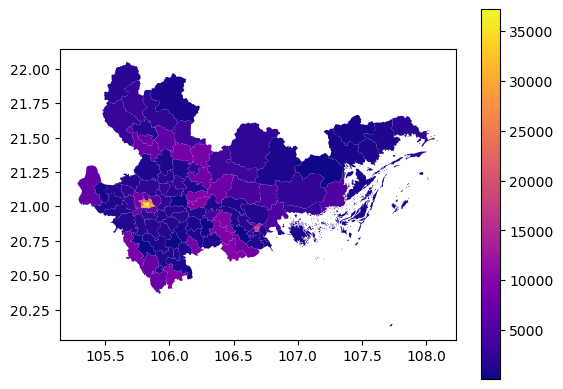

In [802]:
gdf[gdf['region'].isin(["HA NOI","HAI PHONG", "QUANG NINH", "HUNG YEN","THAI NGUYEN", "HAI DUONG", "HA NAM", "BAC GIANG", "BAC NINH"])].plot(column="density", legend=True, cmap='plasma')